# 15 : Regroupement par k-moyennes

## Algorithmes basés centroïdes

In [1]:
import numpy as np
A = np.array([165, 55, 70])
B = np.array([185, 60, 30])

D = (A - B)
D = D**2
D = np.sqrt(np.sum(D))

print(D)

45.0


## Exemple avec données graphiques

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits()
scaler = StandardScaler()
X = scaler.fit_transform(digits.data)
ground_truth = digits.target

In [32]:
from sklearn.cluster import KMeans
regroup = KMeans(n_clusters=10, 
                    n_init=10, random_state=1)
regroup.fit(X)

KMeans(n_clusters=10, n_init=10, random_state=1)

## Recherche des solutions optimales

In [33]:
import numpy as np
import pandas as pd

ms = np.column_stack((ground_truth,regroup.labels_))
df = pd.DataFrame(ms, 
                  columns = ['Données réelles','Clusters'])
pd.crosstab(df['Données réelles'], df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Données réelles,,,,,,,,,,,
0,0,176,0,0,1,0,1,0,0,0,178
1,58,0,0,97,0,0,0,0,27,0,182
2,5,0,2,28,0,5,0,89,48,0,177
3,0,0,7,10,0,152,0,13,1,0,183
4,7,0,4,4,157,0,0,0,0,9,181
5,1,0,2,62,2,71,3,41,0,0,182
6,1,1,0,4,0,0,175,0,0,0,181
7,3,0,151,0,0,0,0,8,0,17,179
8,15,0,2,97,0,46,3,11,0,0,174


In [34]:
import numpy as np
inertia = list()
for k in range(1,21):
    regroup = KMeans(n_clusters=k, 
                        n_init=10, random_state=1)
    regroup.fit(X)
    inertia.append(regroup.inertia_)
delta_inertia = np.diff(inertia) * -1

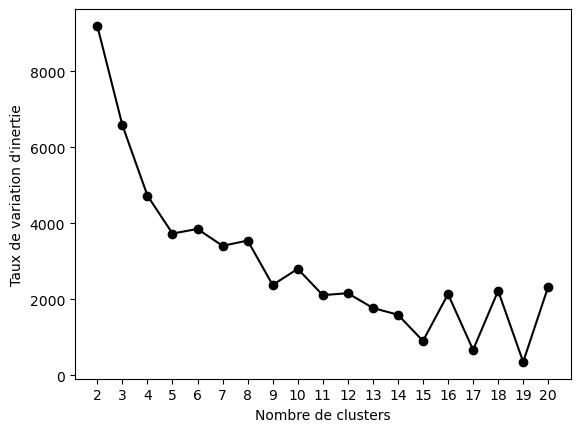

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
x_range = [k for k in range(2, 21)]
plt.xticks(x_range)
plt.plot(x_range, delta_inertia, 'ko-')
plt.xlabel("Nombre de clusters")
plt.ylabel("Taux de variation d'inertie")
plt.show()

## Regroupement de mégadonnées

In [23]:
k = 10
regroup = KMeans(n_clusters=k, 
                    n_init=10, random_state=1)
regroup.fit(X)
inertie_kmoy = regroup.inertia_
print(f"Inertie k-moyennes : {inertie_kmoy:0.1f}")

Inertie k-moyennes : 69408.6


In [24]:
from sklearn.cluster import MiniBatchKMeans
batch_regroup = MiniBatchKMeans(n_clusters=k, 
                                random_state=1,
                                n_init=3)
taille_lot = 100
for ligne in range(0, len(X), taille_lot):
    if ligne+taille_lot < len(X):
        feed = X[ligne:ligne+taille_lot,:]
    else:
        feed = X[ligne:,:]
    batch_regroup.partial_fit(feed)
inertie_parlots = batch_regroup.score(X) * -1

print(f"Inertie MiniBatchKmeans : {inertie_parlots:.1f}")

C:\X\DATALOGY\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Inertie MiniBatchKmeans : 73163.1


# Classification hiérarchique ascendante

## Solution de regroupement hiérarchique

In [27]:
from sklearn.cluster import AgglomerativeClustering

hregroup = AgglomerativeClustering(
    n_clusters=10, metric='euclidean', 
    linkage='ward')
hregroup.fit(X)

ms = np.column_stack((ground_truth,hregroup.labels_))
df = pd.DataFrame(ms, 
                  columns = ['Données réelles','Clusters'])
pd.crosstab(df['Données réelles'], 
            df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Données réelles,,,,,,,,,,,
0,0,0,0,0,0,178,0,0,0,0,178
1,1,150,0,27,0,0,0,0,4,0,182
2,0,15,1,160,1,0,0,0,0,0,177
3,0,11,0,4,168,0,0,0,0,0,183
4,1,4,1,0,0,0,0,12,163,0,181
5,168,0,0,1,12,0,1,0,0,0,182
6,0,1,0,0,0,0,180,0,0,0,181
7,1,1,0,0,1,0,0,25,0,151,179
8,1,168,0,3,2,0,0,0,0,0,174


## Visualisation de regroupements agrégatifs

In [28]:
ground_truth[10:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

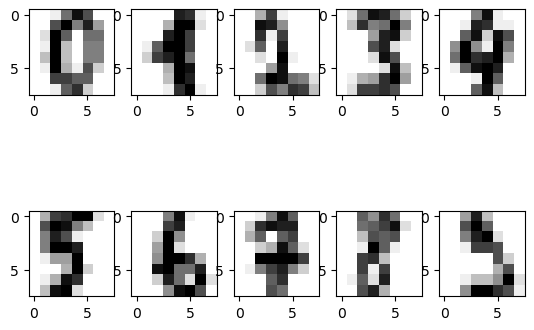

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

for k, img in enumerate(range(10)):
    plt.subplot(2, 5, k+1)
    plt.imshow(digits.images[10+img], 
               cmap='binary', 
               interpolation='none')
plt.show()

In [30]:
hregroup = AgglomerativeClustering(
    n_clusters=10, metric='euclidean',
    linkage='ward')
hregroup.fit(X[10:20, :])

AgglomerativeClustering(metric='euclidean', n_clusters=10)

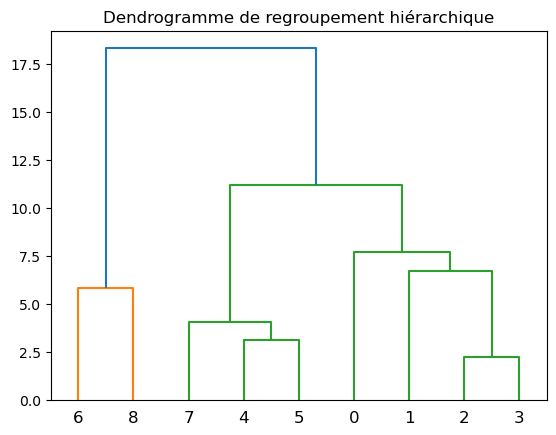

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

linkage_matrix = linkage(hregroup.children_, 'ward')

dendrogram(linkage_matrix)
plt.title('Dendrogramme de regroupement hiérarchique')
plt.show()

# Détection de nouveaux groupes avec DBScan

In [25]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=4.5, min_samples=20)
db.fit(X)

print(f"Nombre de clusters: {len(np.unique(db.labels_))}")

Nombre de clusters: 10


In [26]:
from collections import Counter
print(f"Nombre de clusters: {len(np.unique(db.labels_))}")
print(Counter(db.labels_))

ms = np.column_stack((ground_truth, db.labels_))
df = pd.DataFrame(ms, 
                  columns = ['Données réelles', 'Clusters'])

pd.crosstab(df['Données réelles'], 
            df['Clusters'], margins=True)

Nombre de clusters: 10
Counter({-1: 1032, 0: 172, 1: 157, 4: 111, 3: 95, 5: 90, 7: 64, 6: 35, 2: 21, 8: 20})


Clusters,-1,0,1,2,3,4,5,6,7,8,All
Données réelles,,,,,,,,,,,
0,6,172,0,0,0,0,0,0,0,0,178
1,73,0,0,20,0,89,0,0,0,0,182
2,175,0,0,0,0,2,0,0,0,0,177
3,94,0,0,0,0,0,89,0,0,0,183
4,126,0,0,0,0,0,0,35,0,20,181
5,179,0,1,0,0,0,0,0,2,0,182
6,25,0,156,0,0,0,0,0,0,0,181
7,84,0,0,0,95,0,0,0,0,0,179
8,154,0,0,0,0,20,0,0,0,0,174
